In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa.core import load
from librosa.feature import melspectrogram, tempogram
from librosa.display import specshow

In [2]:
wav = load("audio/temp0.wav")

In [3]:
mel_spectrogram = melspectrogram(wav[0], hop_length=44100//30)

In [4]:
tempo = tempogram(wav[0], hop_length=44100//30)

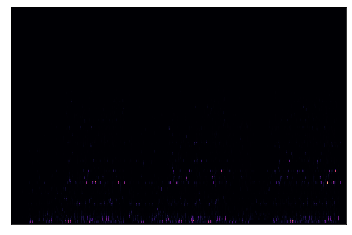

In [5]:
specshow(librosa.amplitude_to_db(D,
...                                                  ref=np.max),
...                          y_axis='log', x_axis='time'))

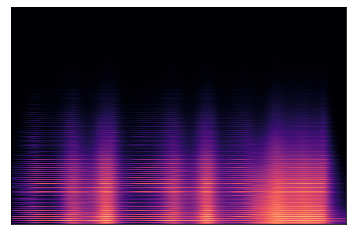

In [6]:
specshow(tempo)

In [7]:
print(mel_spectrogram.shape)
print(tempo.shape)

(128, 3040)
(384, 3040)


In [8]:
features = np.concatenate([mel_spectrogram, tempo], 0)

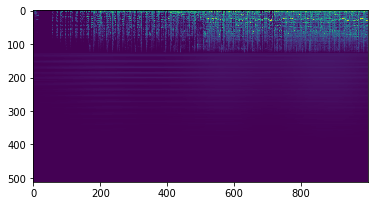

In [16]:
plt.imshow(np.log1p(features[:, :1000]))

In [10]:
print(features.min(), features.max(), features.mean())

-4.2619562221245365e-16 8496.5517578125 7.508642900602549


In [11]:
log_feats = np.log1p(features)

In [12]:
print(log_feats.min(), log_feats.max(), log_feats.mean())

-4.2619562221245374e-16 9.047533372497588 0.48671398003925226


In [13]:
import torch
from torch.utils.data import Dataset

In [14]:
class MusicDataset(Dataset):
    def __init__(self, path):
        self.path = path
        self.files = os.listdir(path)
    def __getitem__(self, index):
        filename = self.path + self.files[index]
        wav = load(filename)
        mel_spectrogram = melspectrogram(wav)
        tempogram = tempogram(wav)
        merged = np.concatenate([mel_spectrogram, tempogram], 0)
        scaled = np.log1p(merged)
        return scaled
    def __len__(self):
        return len(self.files)